In [225]:
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os
import pandas as pd
import datetime
import matplotlib.ticker as ticker
sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19
from header_plotting import *

In [2]:
%load_ext autoreload
%autoreload 2

In [230]:
df = pd.read_csv("../../data/CLEAN_PHSM")

In [237]:
df = df[df["COUNTRY_TERRITORY_AREA"]=="Netherlands"]
df["DATE_START"] = pd.to_datetime(df["DATE_START"],format="%Y-%m-%d")

In [241]:
df = df.set_index("DATE_START")


KeyError: "None of ['DATE_START'] are in the columns"

In [254]:
b = datetime.datetime(2021,5,1)
e =  datetime.datetime(2021,8,1)
df = df.sort_index()
df.to_csv("test.csv")

# Load PHMS severity index

In [148]:
df = pd.read_csv("../../data/Severity index - 2022-03-31.csv")
df["Date"] = pd.to_datetime(df["Date"],format="%d-%b-%y")

In [228]:
df.loc["Netherlands",:].columns

Index(['1.4_ORD', '1.4_GEO', '4.1_ORD', '4.1_GEO', '4.2_ORD', '4.2_GEO',
       '4.3_ORD', '4.3_GEO', '4.5_ORD', '4.5_GEO', '5_E', '5_Q', '1.4_IND',
       '4.1_IND', '4.2_IND', '4.3_IND', '4.5_IND', '5_IND', 'PHSM SI'],
      dtype='object')

In [154]:
a = df["Country"].unique()
a.sort()
a

array(['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Kazakhstan', 'Kosovo',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'San Marino', 'Serbia', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Tajikistan',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United Kingdom',
       'Uzbekistan'], dtype=object)

In [156]:
df = df.set_index(["Country","Date"])

## Preliminary plots of all countries

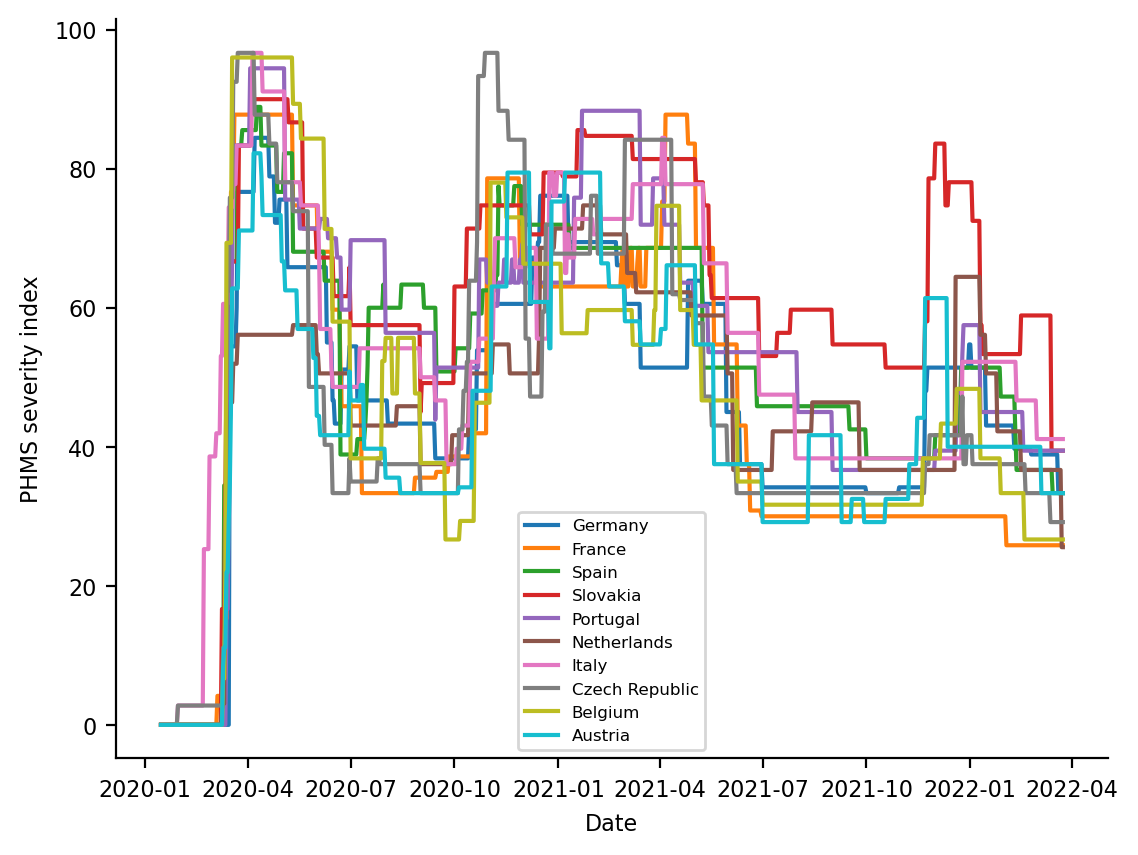

In [202]:
countries = ["England","Scotland","Germany","France","Spain","Slovakia","Portugal","Netherlands","Italy","Czechia","Belgium","Austria"]
x = []
for country in countries:
    if country in ["England","Scotland"]:
        continue
    if country == "Czechia":
        country = "Czech Republic"
    x.append(country)
    plt.plot(df.loc[country,:]["PHSM SI"].resample('D').fillna(0),label=country)
plt.xlabel("Date")
plt.ylabel("PHMS severity index")
plt.legend()
plt.show()

In [203]:
piv = pd.pivot_table(df.loc[x,:],index="Country",columns="Date",values="PHSM SI")

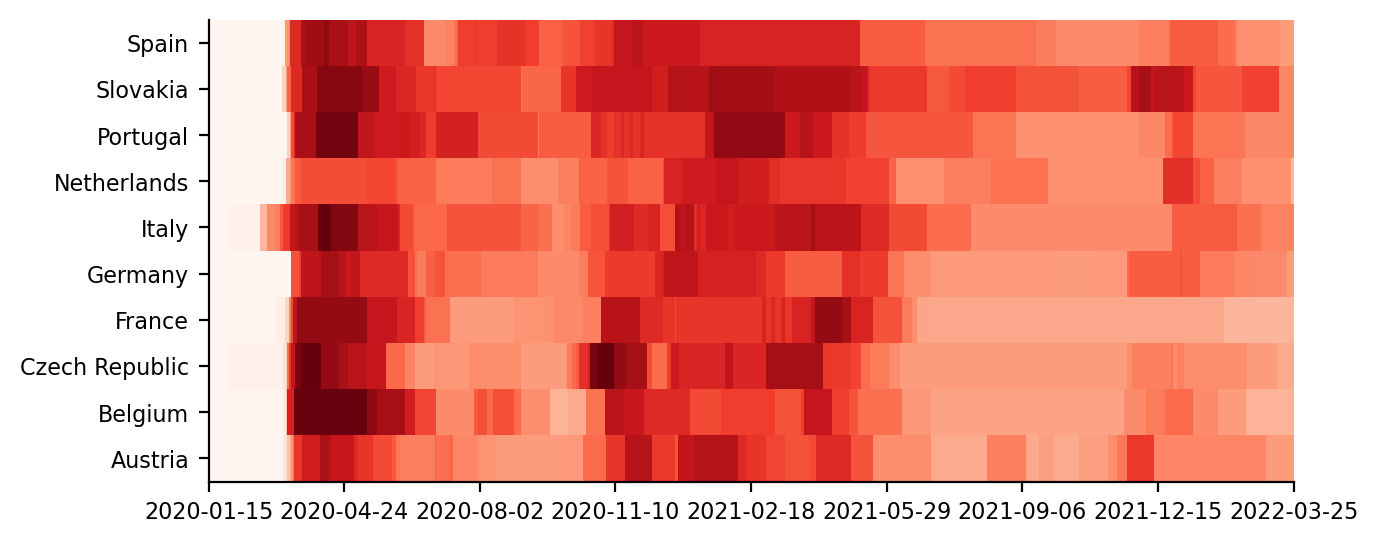

In [224]:
fig, ax = plt.subplots(1,1,figsize=(7,3))
heatmap = ax.pcolormesh(piv, cmap=plt.cm.Reds, alpha=1)

ax.set_yticks(np.arange(piv.shape[0]) + 0.5, minor=False)
#ax.set_xticks(np.arange(piv.shape[1]) + 0.5, minor=False)
ax.set_yticklabels(piv.index, minor=False)
ax.xaxis.set_major_formatter(lambda x,pos: (piv.columns[0]+datetime.timedelta(days=x)).strftime("%Y-%m-%d"))
plt.show()